# ML Techniques & Autoencoders

# 1.Importing libraries

In [1]:
#Importing libraries
import pandas as pd # library for data processing
import numpy as np 
import os # library for operating system

In [2]:
import matplotlib.pyplot as plt # visualization function collection
from PIL import Image # image loading library
%matplotlib inline
import seaborn as seaborn# data visualization library
import warnings # alert function
warnings.filterwarnings("ignore")
import itertools # iteration tool function
import io # stream handling 
import plotly.offline as py # generate visualizations in offline   
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go # display the graphs more effectively 

# 2. Importing dataset

In [3]:
# Csv into dataframe
insurancedata = pd.read_csv("Automobile_Insurance")
# Display first 5 rows
insurancedata.head() 

,age,policy_state,policy_deductable,policy_annual_premium,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_number
0,48,OH,1000,1406.91,466132,MALE,MD,craft-repair,sleeping,husband,...,YES,71610,6510,13020,52080,Saab,92x,2004,YES,521585
1,42,IN,2000,1197.22,468176,MALE,MD,machine-op-inspct,reading,other-relative,...,YES,5070,780,780,3510,Mercedes,E400,2007,YES,342868
2,29,OH,2000,1413.14,430632,FEMALE,PhD,sales,board-games,own-child,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,NO,687698
3,41,IL,2000,1415.74,608117,FEMALE,PhD,armed-forces,board-games,unmarried,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,YES,227811
4,44,IL,1000,1583.91,610706,MALE,Associate,sales,board-games,unmarried,...,NO,6500,1300,650,4550,Accura,RSX,2009,NO,367455


In [4]:
insurancedata.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
age                            1000 non-null int64
policy_state                   1000 non-null object
policy_deductable              1000 non-null int64
policy_annual_premium          1000 non-null float64
insured_zip                    1000 non-null int64
insured_sex                    1000 non-null object
insured_education_level        1000 non-null object
insured_occupation             1000 non-null object
insured_hobbies                1000 non-null object
insured_relationship           1000 non-null object
incident_type                  1000 non-null object
incident_severity              1000 non-null object
authorities_contacted          1000 non-null object
incident_state                 1000 non-null object
incident_city                  1000 non-null object
incident_hour_of_the_day       1000 non-null int64
number_of_vehicles_involved    1000 non-null int64
property_damag

# 3.Data Exploration

In [5]:
# Removing null values
insurancedata = insurancedata.dropna()
insurancedata.shape 

(1000, 30)

In [6]:
# Missing and Unique values
print ("\nMissing values :  ", insurancedata.isnull().sum().values.sum())
print ("\nUnique values :  \n", insurancedata.nunique())


Missing values :   0

Unique values :  
 age                              46
policy_state                      3
policy_deductable                 3
policy_annual_premium           991
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
incident_type                     4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage                   2
bodily_injuries                   3
witnesses                         4
police_report_available           2
total_claim_amount              763
injury_claim                    638
property_claim                  626
vehicle_claim                   726
auto_make                        14
auto_model            

# 4.Data Manipulation


In [7]:
# Replacing values
insurancedata["fraud_reported"] = insurancedata["fraud_reported"].replace({1:"YES",0:"NO"})


# Categorical & numerical columns separations
Id     = ['policy_number']
target = ["fraud_reported"]
categorycolumns   = insurancedata.nunique()[insurancedata.nunique() < 6].keys().tolist()
categorycolumns   = [x for x in categorycolumns if x not in target]
numericalcolumns   = [x for x in insurancedata.columns if x not in categorycolumns + target + Id]

In [8]:
# Fraud and non fraud into 2 diff dataframes
fraud     = insurancedata[insurancedata["fraud_reported"] == "YES"]
not_fraud = insurancedata[insurancedata["fraud_reported"] == "NO"]

In [9]:
fraud.shape

(247, 30)

In [10]:
not_fraud.shape

(753, 30)

In [11]:
insurancedata.dtypes

age                              int64
policy_state                    object
policy_deductable                int64
policy_annual_premium          float64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
incident_type                   object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                 object
bodily_injuries                  int64
witnesses                        int64
police_report_available         object
total_claim_amount               int64
injury_claim                     int64
property_claim                   int64
vehicle_claim                    int64
auto_make                

# 5.Data Exploration Analysis

In [12]:
#Fraud analysis from dataset 

datalabel = insurancedata["fraud_reported"].value_counts().keys().tolist()

datavalues = insurancedata["fraud_reported"].value_counts().values.tolist()

trace = go.Pie(labels = datalabel ,
               values = datavalues ,
               marker = dict(colors =  [ 'darkblue' ,'red'], line = dict(color = "black", width =  1.3)),
               rotation = 90, hoverinfo = "label+value+text",hole = .5)
layout = go.Layout(dict(title = "Fraud Reported Percentage",plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",))

data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

# 6.Data preprocessing

In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


Id     = ['policy_number']
target = ["fraud_reported"]



categorycolumns   = insurancedata.nunique()[insurancedata.nunique() < 40].keys().tolist()
categorycolumns   = [x for x in categorycolumns if x not in target]



numericalcolumns   = [x for x in insurancedata.columns if x not in categorycolumns + target + Id]


binarycolumns   = insurancedata.nunique()[insurancedata.nunique() == 2].keys().tolist()

multiplecolumns = [i for i in categorycolumns if i not in binarycolumns]

#Binary columns label encoding 
labencode = LabelEncoder()
for i in binarycolumns :
    insurancedata[i] = labencode.fit_transform(insurancedata[i])
    
#Duplicating columns for multi value columns
insurancedata = pd.get_dummies(data = insurancedata,columns = multiplecolumns )

#Scaling Numerical columns
stnd = StandardScaler()
scaled_data = stnd.fit_transform(insurancedata[numericalcolumns])
scaled_data = pd.DataFrame(scaled_data,columns=numericalcolumns)

#dropping original values merging scaled values for numerical columns
df_insurancedata_org = insurancedata.copy()
insurancedata = insurancedata.drop(columns = numericalcolumns,axis = 1)
insurancedata = insurancedata.merge(scaled_data,left_index=True,right_index=True,how = "left")

In [14]:
# Variable Summary

# To find mean, count, standard deviation, minimum, percentage and maximum 

variablesummary = (df_insurancedata_org[[i for i in df_insurancedata_org.columns if i not in Id]].
           describe().transpose().reset_index())

variablesummary = variablesummary.rename(columns = {"index" : "feature"})
variablesummary = np.around(variablesummary,3)

val_lst = [variablesummary['feature'], variablesummary['count'],variablesummary['mean'],
           variablesummary['std'],variablesummary['min'], variablesummary['25%'],
           variablesummary['50%'], variablesummary['75%'], variablesummary['max']]

trace  = go.Table(header = dict(values = variablesummary.columns.tolist(),
                                line = dict(color = ['black']),
                                fill = dict(color = ['royalblue']),
                               ),
                  cells  = dict(values = val_lst,
                                line = dict(color = ['black']),
                                fill = dict(color = ["white"])
                               ),
                  columnwidth = [200,60,100,100,60,60,80,80,80])
layout = go.Layout(dict(title = "Variable Summary"))
figure = go.Figure(data=[trace],layout=layout)
py.iplot(figure)

# 7.Correlation Matrix

In [15]:
#correlation
fraudcorrelation = insurancedata.corr()
#tick labels
matrixcolumns = fraudcorrelation.columns.tolist()
#convert to array
arraycorrelation  = np.array(fraudcorrelation)

#Plotting
Trc = go.Heatmap(z = arraycorrelation,x = matrixcolumns, y = matrixcolumns, colorscale = "viridis",
                   colorbar   = dict(title = "Pearson Correlation coefficient of finding fraud dataset", titleside = "right") , )

layout = go.Layout(dict(title = "Correlation Matrix",autosize = False,height  = 700,
                        width   = 800,margin  = dict(r = 0 ,l = 210,t = 25,b = 210,),
                        yaxis   = dict(tickfont = dict(size = 9)),xaxis   = dict(tickfont = dict(size = 9))))

data = [Trc]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

# 8.Visualising data with principal components

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

Xdata = insurancedata[[i for i in insurancedata.columns if i not in Id + target]]
Ydata = insurancedata[target]

principalcomponentsanalysis = pca.fit_transform(Xdata)
pcadata = pd.DataFrame(principalcomponentsanalysis,columns = ["PC1","PC2"])
pcadata = pcadata.merge(Ydata,left_index=True,right_index=True,how="left")
pcadata["fraud_reported"] = pcadata["fraud_reported"].replace({1:"fraud",0:"Not fraud"})

def pcascatter(target,color) :
    tracer = go.Scatter(x = pcadata[pcadata["fraud_reported"] == target]["PC1"] ,
                        y = pcadata[pcadata["fraud_reported"] == target]["PC2"],
                        name = target,
                        mode = "markers",
                        marker = dict(color = color,line = dict(width = .5), symbol =  "square-open"))
    return tracer
layout = go.Layout(dict(title = "Visualising data with principal components analysis",plot_bgcolor  = "rgb(243,243,243)",
         paper_bgcolor = "rgb(243,243,243)", xaxis = dict(gridcolor = 'rgb(255, 255, 255)',title = "principal component 1", 
         zerolinewidth=1,ticklen=5,gridwidth=2),yaxis = dict(gridcolor = 'rgb(255, 255, 255)',title = "principal component 2",
         zerolinewidth=1,ticklen=5,gridwidth=2),height = 600))
T1 = pcascatter("fraud",'red')
T2 = pcascatter("Not fraud",'darkblue')
data = [T2,T1]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

In [17]:
print(principalcomponentsanalysis)

[[ 1.21603832  0.55852672]
 [-3.34271044 -0.19719755]
 [-1.027831   -0.6982736 ]
 ...
 [ 0.70571883 -0.50607141]
 [-0.33891714  0.97016016]
 [-3.33558488  0.93646007]]


# 9a. Model Building: Logistic regression

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
from yellowbrick.classifier import DiscriminationThreshold
import warnings
warnings.filterwarnings('ignore')
import plotly.tools as tools 

# train and test data split
train,test = train_test_split(insurancedata,test_size = .30 ,random_state = 123)

#To separate dependant and independant variable
columns    = [i for i in insurancedata.columns if i not in Id + target]
trainX = train[columns] # To train predictor variables
trainY = train[target]  # To train target variables
testX  = test[columns]  # To test predictor variables
testY  = test[target]  # To test target variables



In [19]:
def insurancefraudprediction(algorithm,trainingx,testingx,
                             trainingy,testingy,columns,cf,threshold_plot) :

    algorithm.fit(trainingx,trainingy)
    predictions   = algorithm.predict(testingx)
    probabilities = algorithm.predict_proba(testingx)
    
    #coefficients
    if   cf == "coefficients" :
        coefficients  = pd.DataFrame(algorithm.coef_.ravel())
    elif cf == "features" :
        coefficients  = pd.DataFrame(algorithm.feature_importances_)
        
    columndataframe     = pd.DataFrame(columns)
    coeffsummary    = (pd.merge(coefficients,columndataframe,left_index= True,
                              right_index= True, how = "left"))
    coeffsummary.columns = ["coefficients","features"]
    coeffsummary    = coeffsummary.sort_values(by = "coefficients",ascending = False)
    
    print (algorithm)
    print ("\n Classification report : \n",classification_report(testingy,predictions))
    print ("Accuracy   Score : ",accuracy_score(testingy,predictions))
    
    
    #confusion matrix
    confusionmatrix = confusion_matrix(testingy,predictions)
    
    #roc_auc_score
    model_roc_auc = roc_auc_score(testingy,predictions) 
    print ("Area under curve : ",model_roc_auc,"\n")
    fpr,tpr,thresholds = roc_curve(testingy,probabilities[:,1])
    
    #plot confusion matrix
    T1 = go.Heatmap(z = confusionmatrix ,
                        x = ["Not Fraud","Fraud"],
                        y = ["Not Fraud","Fraud"],
                        showscale  = False,colorscale = "rainbow",
                        name = "matrix")
    #plot roc curve
    T2 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2))
    T3 = go.Scatter(x = [0,1],y=[0,1],
                        line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                        dash = 'dot'))
    #plot coeffs
    T4 = go.Bar(x = coeffsummary["features"],y = coeffsummary["coefficients"],
                    name = "coefficients",
                    marker = dict(color = coeffsummary["coefficients"],
                                  colorscale = "purples",
                                  line = dict(width = .6,color = "black")))
    
    #subplots
    fig = tools.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                            subplot_titles=('Confusion Matrix',
                                            'Receiver operating characteristic',
                                            'Feature Importances'))
    
    fig.append_trace(T1,1,1)
    fig.append_trace(T2,1,2)
    fig.append_trace(T3,1,2)
    fig.append_trace(T4,2,1)
    
    fig['layout'].update(showlegend=False, title="Model performance" ,
                         autosize = False,height = 900,width = 800,
                         plot_bgcolor = 'rgba(240,240,240, 0.95)',
                         paper_bgcolor = 'rgba(240,240,240, 0.95)',
                         margin = dict(b = 195))
    fig["layout"]["xaxis2"].update(dict(title = "false positive rate"))
    fig["layout"]["yaxis2"].update(dict(title = "true positive rate"))
    fig["layout"]["xaxis3"].update(dict(showgrid = True,tickfont = dict(size = 10),
                                        tickangle = 90))
    py.iplot(fig)
    
    
        
Logistic_regg  = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

##logistic regression baseline model
insurancefraudprediction(Logistic_regg,trainX,testX,trainY,testY,
                         columns,"coefficients",threshold_plot = True)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.86      0.89      0.87       234
           1       0.54      0.47      0.50        66

    accuracy                           0.80       300
   macro avg       0.70      0.68      0.69       300
weighted avg       0.79      0.80      0.79       300

Accuracy   Score :  0.7966666666666666
Area under curve :  0.6792929292929293 



# 9b.Decision Tree Visualization
Using top three numerical features

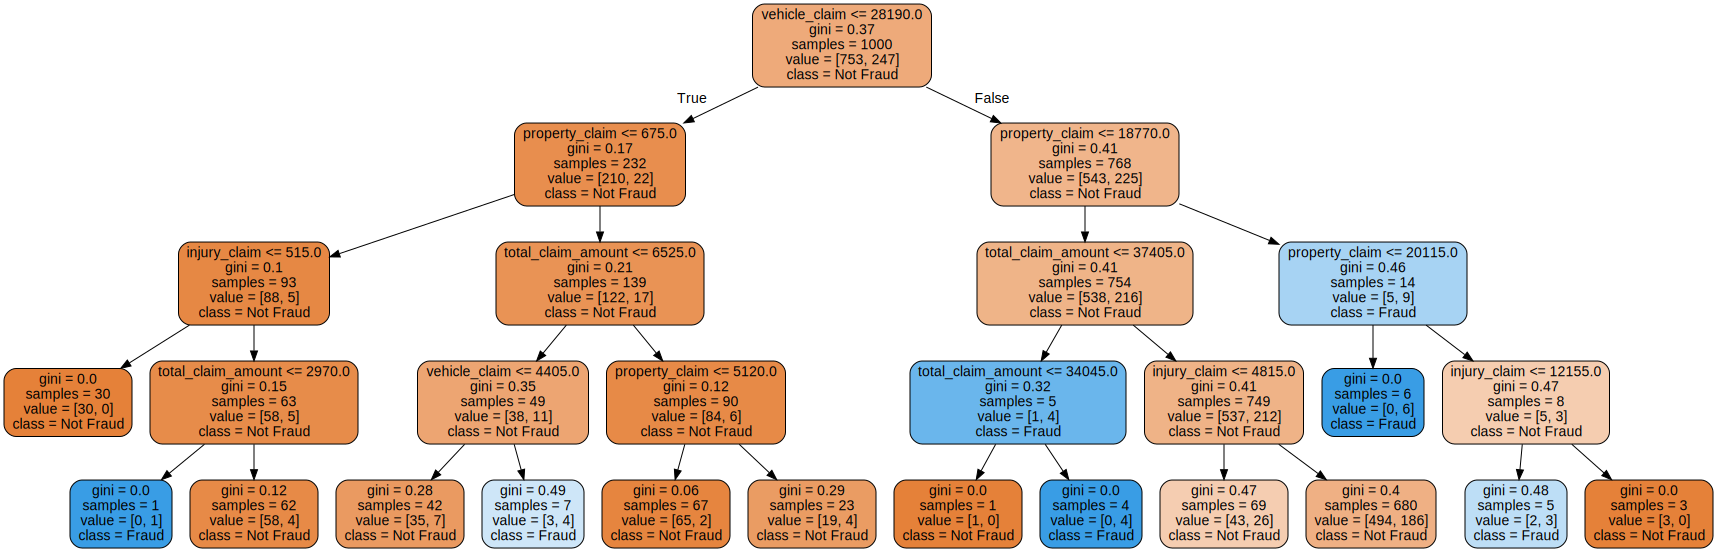

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import tree
from graphviz import Source
import graphviz
from IPython.display import SVG,display
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

#Categorical features of top 3
featurescateg  = score[score["feature_type"] == "Categorical"]["features"][:4].tolist()

#Numerical features of top 3
featuresnum  = score[score["feature_type"] == "Numerical"]["features"][:4].tolist()

def plotdecisiontree(columns,maximum_depth,criterion_type,
                       split_type,model_performance = None) : 
    
#Function attributes: columns - selected columns, maximum_depth - decision tree depth, criterion_type - entropy, 
#split_type - random
    
    #dependent and independent variable separation
    dectreex = dfx[columns]
    dectreey = dfy[target]
    
    #model
    dectree_classifier = DecisionTreeClassifier(max_depth = maximum_depth,
                                           splitter  = split_type,
                                           criterion = criterion_type,
                                          )
    dectree_classifier.fit(dectreex,dectreey)
    
    #plot decision tree
    graph = Source(tree.export_graphviz(dectree_classifier,out_file=None,
                                        rounded=True,proportion = False,
                                        feature_names = columns, 
                                        precision  = 2,
                                        class_names=["Not Fraud","Fraud"],
                                        filled = True                         
                                       )
                  )
    
    #model performance
    if model_performance == True :
        insurancefraudprediction(dectree_classifier, dectreex,testX[columns], dectreey,testY, columns,"features",threshold_plot = False)
    display(graph)
    
plotdecisiontree(featuresnum,4,"gini","best")

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

 Classification report : 
               precision    recall  f1-score   support

           0       0.95      0.84      0.89       234
           1       0.60      0.83      0.70        66

    accuracy                           0.84       300
   macro avg       0.77      0.84      0.79       300
weighted avg       0.87      0.84      0.85       300

Accuracy   Score :  0.84
Area under curve :  0.8376068376068377 



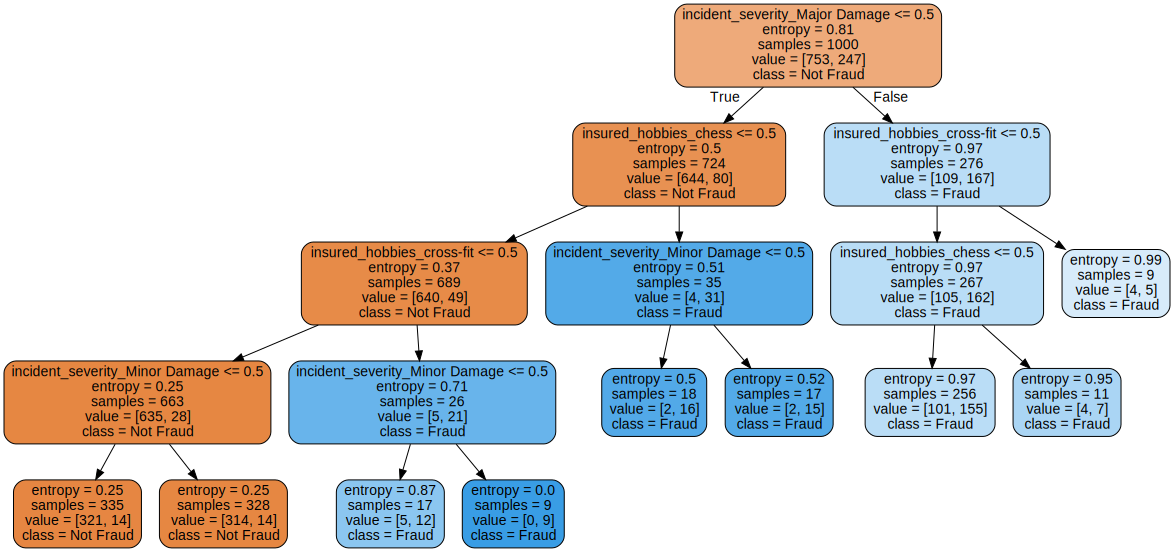

In [22]:
import warnings
warnings.filterwarnings('ignore')
##Using top three categorical features
plotdecisiontree(featurescateg,4,"entropy","best",
                   model_performance = True ,)

# 9c.Random Forest Classifier

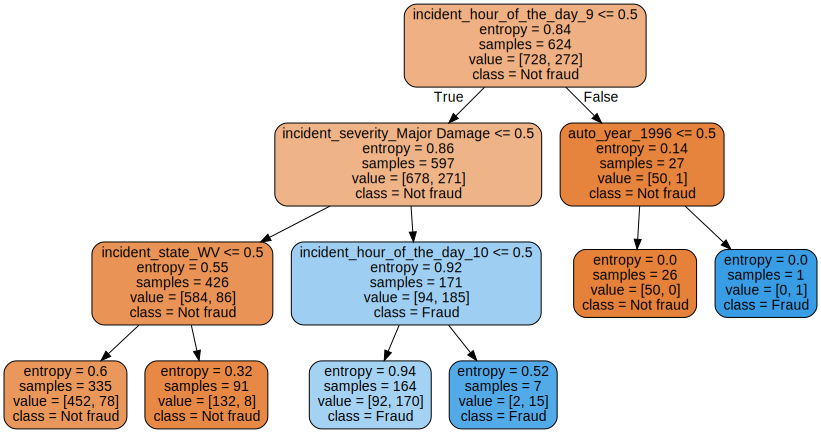

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.78      1.00      0.88       234
           1       0.00      0.00      0.00        66

    accuracy                           0.78       300
   macro avg       0.39      0.50      0.44       300
weighted avg       0.61      0.78      0.68       300

Accuracy   Score :  0.78
Area under curve :  0.5 



In [23]:
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')


def plotrandomforest(columns,nf_estimators, estimated_tree,maximum_depth, criterion_type,model_performance = None) :

#Function attributes: columns - selected columns, maximum_depth - decision tree depth, criterion_type - entropy, 
#estimated_tree - tree number, nf_estimators - number of trees 

    dataframeRF = df_insurancedata_org[columns + target].copy()
    
    #train and test datasets
    rfx     = dataframeRF[[i for i in columns if i not in target]]
    rfy     = dataframeRF[target]
    
    #random forest classifier
    rfc   = RandomForestClassifier(n_estimators = nf_estimators,
                                   max_depth = maximum_depth,
                                   criterion = criterion_type,
                                  )
    rfc.fit(rfx,rfy)
    
    estimated_tree = rfc.estimators_[estimated_tree]
    
    graph = Source(tree.export_graphviz(estimated_tree,out_file=None,
                                        rounded=True,proportion = False,
                            feature_names = columns, 
                            precision  = 2,
                            class_names=["Not fraud","Fraud"],
                            filled = True))
    display(graph)
    
    #model performance
    if model_performance == True :
        insurancefraudprediction(rfc,
                                 rfx,testX[columns],
                                 rfy,testY,
                                 columns,"features",threshold_plot = True)
        

columns1 = [ i for i in trainX.columns if i not in target + Id] 
plotrandomforest(columns1,100,99,3,"entropy",True)

# 9d. KNN Classifier

In [24]:
##KNN algorithm
def insurancefraudprediction_alg(algorithm,trainingx,testingx,
                                 trainingy,testingy,threshold_plot = True) :
    
    #model
    algorithm.fit(trainingx,trainingy)
    predictions   = algorithm.predict(testingx)
    probabilities = algorithm.predict_proba(testingx)
    
    print ( algorithm)
    print ("\n Classification report : \n",classification_report(testingy,predictions))
    print ("Accuracy Score   : ",accuracy_score(testingy,predictions))
    
    #confusion matrix
    confessmatrix = confusion_matrix(testingy,predictions)
    
    #roc_auc_score
    model_roc_auc = roc_auc_score(testingy,predictions) 
    print ("Area under curve : ",model_roc_auc)
    fpr,tpr,thresholds = roc_curve(testingy,probabilities[:,1])
     
    #plot roc curve
    T1 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2),
                       )
    T2 = go.Scatter(x = [0,1],y=[0,1],
                        line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                        dash = 'dot'))
    
    #plot confusion matrix
    T3 = go.Heatmap(z = confessmatrix ,x = ["Not fraud","Fraud"],
                        y = ["Not fraud","Fraud"],
                        showscale  = False,colorscale = "tealgrn",name = "matrix",
                        xaxis = "x2",yaxis = "y2"
                       )
    
    layout = go.Layout(dict(title="Model performance" ,
                            autosize = False,height = 500,width = 800,
                            showlegend = False,
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(title = "false positive rate",
                                         gridcolor = 'rgb(255, 255, 255)',
                                         domain=[0, 0.6],
                                         ticklen=5,gridwidth=2),
                            yaxis = dict(title = "true positive rate",
                                         gridcolor = 'rgb(255, 255, 255)',
                                         zerolinewidth=1,
                                         ticklen=5,gridwidth=2),
                            margin = dict(b=200),
                            xaxis2=dict(domain=[0.7, 1],tickangle = 90,
                                        gridcolor = 'rgb(255, 255, 255)'),
                            yaxis2=dict(anchor='x2',gridcolor = 'rgb(255, 255, 255)')
                           )
                  )
    data = [T1,T2,T3]
    fig = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)
    
    

    
from sklearn.neighbors import KNeighborsClassifier
knn_base  = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,weights='uniform')

insurancefraudprediction_alg(knn_base,trainX,testX,trainY,testY,threshold_plot = True)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=1, n_neighbors=5, p=2,
                     weights='uniform')

 Classification report : 
               precision    recall  f1-score   support

           0       0.82      0.93      0.87       234
           1       0.52      0.26      0.34        66

    accuracy                           0.78       300
   macro avg       0.67      0.59      0.61       300
weighted avg       0.75      0.78      0.75       300

Accuracy Score   :  0.7833333333333333
Area under curve :  0.5945998445998446


# 9.e Navie Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB

#applying baseline model
ganaba_bl = GaussianNB(priors=None)
insurancefraudprediction_alg(ganaba_bl,trainX,testX,trainY,testY)

GaussianNB(priors=None, var_smoothing=1e-09)

 Classification report : 
               precision    recall  f1-score   support

           0       0.83      0.66      0.74       234
           1       0.30      0.53      0.39        66

    accuracy                           0.63       300
   macro avg       0.57      0.59      0.56       300
weighted avg       0.72      0.63      0.66       300

Accuracy Score   :  0.63
Area under curve :  0.5942113442113443


# 9.f Support Vector Machine

In [26]:
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

#Support vector classifier using bl
svclinear_bl  = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
               decision_function_shape='ovr', degree=3, gamma=1.0, kernel='linear',
               max_iter=-1, probability=True, random_state=None, shrinking=True,
               tol=0.001, verbose=False)

columns = [i for i in insurancedata.columns if i not in Id + target]
insurancefraudprediction(svclinear_bl,trainX,testX,trainY,testY,
                         columns,"coefficients",threshold_plot = False)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1.0, kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.87      0.86      0.87       234
           1       0.54      0.56      0.55        66

    accuracy                           0.80       300
   macro avg       0.71      0.71      0.71       300
weighted avg       0.80      0.80      0.80       300

Accuracy   Score :  0.7966666666666666
Area under curve :  0.7119269619269619 



# 9.g XG Boost

In [27]:
from xgboost import XGBClassifier
import xgboost as xgb
xgboost = xgb.XGBRegressor(random_state=42,verbosity=0)
#silent="true"
#xgboost = xgb.XGBRegressor(objective ='reg:linear', verbosity = 0, random_state=42)
#xgboost 
xgc_bl = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                    colsample_bytree=1, gamma=0, learning_rate=0.9, max_delta_step=0,
                    max_depth = 7, min_child_weight=1, missing=None, n_estimators=100,
                    n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
                    reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                    silent=True, subsample=1, verbosity=0)
insurancefraudprediction(xgc_bl,trainX,testX,trainY,testY,columns,"features",threshold_plot = True)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.9, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=1, nthread=1, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=0)

 Classification report : 
               precision    recall  f1-score   support

           0       0.87      0.90      0.88       234
           1       0.59      0.53      0.56        66

    accuracy                           0.82       300
   macro avg       0.73      0.71      0.72       300
weighted avg       0.81      0.82      

# 10.Model performances

In [28]:
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
import warnings
warnings.filterwarnings('ignore')
#gives model report in dataframe
def model_report(model,trainingx,testingx,trainingy,testingy,name) :
    model.fit(trainingx,trainingy)
    predictions  = model.predict(testingx)
    accuracy     = accuracy_score(testingy,predictions)
    recallscore  = recall_score(testingy,predictions)
    precision    = precision_score(testingy,predictions)
    roc_auc      = roc_auc_score(testingy,predictions)
    f1score      = f1_score(testingy,predictions) 
    kappa_metric = cohen_kappa_score(testingy,predictions)
    
    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy_score"  : [accuracy],
                       "Recall_score"    : [recallscore],
                       "Precision"       : [precision],
                       "f1_score"        : [f1score],
                       "Area_under_curve": [roc_auc],
                       "Kappa_metric"    : [kappa_metric],
                      })
    return df

In [30]:
import warnings
warnings.filterwarnings('ignore')
import plotly.figure_factory as figfactory
#outputs for every Baseline model
modelLR_BL = model_report(Logistic_regg,trainX,testX,trainY,testY, "Log Reg")
decision_tree = DecisionTreeClassifier(max_depth = 9,random_state = 123,splitter  = "best",criterion = "gini",)
modelDT_BL = model_report(decision_tree,trainX,testX,trainY,testY,"Decision Tree")
modelKNN_BL = model_report(knn_base,trainX,testX,trainY,testY,"KNN Classifier")
rfc = RandomForestClassifier(n_estimators = 1000, random_state = 123, max_depth = 9,criterion = "gini")
modelRFC_BL = model_report(rfc,trainX,testX,trainY,testY,"RF Classifier")
modelNB_BL = model_report(ganaba_bl,trainX,testX,trainY,testY, "Naive Bayes")
modelSVCL_BL = model_report(svclinear_bl,trainX,testX,trainY,testY,"SVM Linear")
# modelSVCR_BL = model_report(svcrbf_bl,trainX,testX,trainY,testY, "SVM RF (BL)")
modelXG_BL = model_report(xgc_bl,trainX,testX,trainY,testY, "XGBoost Classifier")

#concat all models
modelperformances_bl = pd.concat([modelLR_BL,modelDT_BL,modelKNN_BL,modelRFC_BL,modelNB_BL,modelSVCL_BL,modelXG_BL]
                                 ,axis = 0).reset_index()

modelperformances_bl = modelperformances_bl.drop(columns = "index",axis =1)

table  = figfactory.create_table(np.round(modelperformances_bl,4))
table.layout.width=1000
py.iplot(table)

In [31]:
modelperformances_bl
def output_tracer(metric,color) :
    tracer = go.Bar(y = modelperformances_bl["Model"] ,
                    x = modelperformances_bl[metric],
                    orientation = "h",name = metric ,
                    marker = dict(line = dict(width =.7),
                                  color = color)
                   )
    return tracer

layout = go.Layout(dict(title = "Model performances",plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)", xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                        title = "metric",zerolinewidth=1,ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)', zerolinewidth=1,ticklen=5,gridwidth=2),
                        margin = dict(l = 250), height = 780) )

T1  = output_tracer("Accuracy_score","#6699FF")
T2  = output_tracer('Recall_score',"red")
T3  = output_tracer('Precision',"#33CC99")
T4  = output_tracer('f1_score',"lightgrey")
T5  = output_tracer('Kappa_metric',"#FFCC99")
T6  = output_tracer('Area_under_curve',"pink")

data = [T1,T2,T3,T4,T5,T6]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

# 11 Autoencoders

Autoencoders are designed to train only non-fraud records whereas if it trains fraud, the encoder fails. The output or loss should be 0 and 1 based on balanced or imbalanced data. 

In [35]:
#Train Non-fraud

input_dim = trainX.shape[1]
encoding_dim = 14
train_d = train[train.fraud_reported == 0]
trainX = train_d[columns]
trainY = train_d[target]

testX  = test[columns] 
testY  = test[target]

trainX=trainX.values
testX=testX.values

In [36]:
# Import Libraries
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

The ‘Tanh’ activation function is used for the hidden and encoder layer whereas the ‘sigmoid’ layer is used in the decoder layer. The number of epochs is 100 and the batch size used is 32.

In [37]:
input_layer = Input(shape=(input_dim, ))

encoder = Dense(encoding_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)

decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)

In [38]:
nb_epoch = 100
batch_size = 32

autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)

history = autoencoder.fit(trainX, trainX,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(testX, testX),
                    verbose=1,
                    callbacks=[checkpointer, tensorboard]).history
#autoencoder = load_model('model.h5')

Epoch 1/100
 1/17 [>.............................] - ETA: 0s - loss: 0.1329 - accuracy: 0.0312WARNING:tensorflow:From C:\Users\INDHUMATHI\Anaconda3\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
17/17 [==============================] - 0s 16ms/step - loss: 0.1309 - accuracy: 0.0039 - val_loss: 0.1287 - val_accuracy: 0.0067
Epoch 2/100
17/17 [==============================] - 0s 3ms/step - loss: 0.1255 - accuracy: 0.0231 - val_loss: 0.1236 - val_accuracy: 0.0200
Epoch 3/100
17/17 [==============================] - 0s 3ms/step - loss: 0.1206 - accuracy: 0.0385 - val_loss: 0.1194 - val_accuracy: 0.0233
Epoch 4/100
17/17 [==============================] - 0s 3ms/step - loss: 0.1171 - accuracy: 0.0385 - val_loss: 0.1166 - val_accuracy: 0.0300
Epoch 5/100
17/17 [==============================] - 0s 3ms/step -

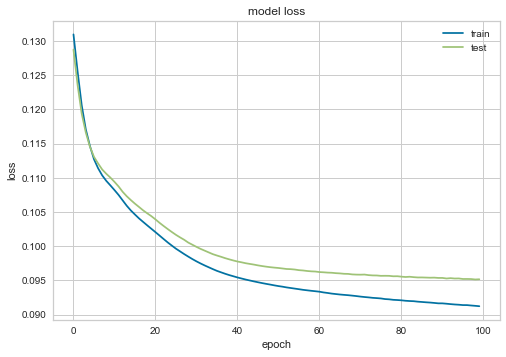

In [39]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [40]:
predictions = autoencoder.predict(testX)

In [41]:
y_test = testY['fraud_reported']
mse = np.mean(np.power(testX - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse , 'true_class': y_test.astype(float)})
error_df.describe()


,reconstruction_error,true_class
count,300.000000,300.000000
mean,0.094656,0.220000
std,0.021016,0.414938
min,0.063452,0.000000
25%,0.079452,0.000000
50%,0.087632,0.000000
75%,0.103281,0.000000
max,0.162689,1.000000


Text(0.5, 1.0, 'Outlier Score')

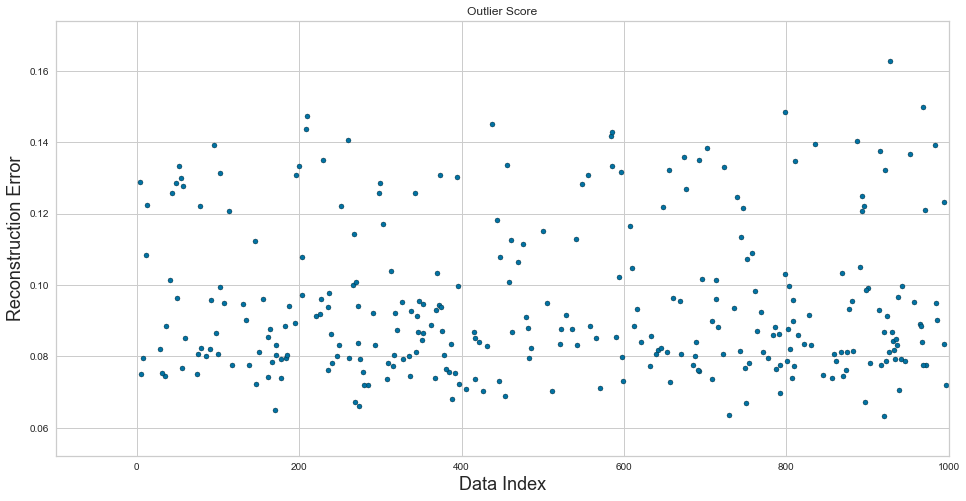

In [42]:
plt.figure(figsize=(16,8))
plt.scatter(error_df.index, error_df['reconstruction_error'], edgecolor='black', s=25)
plt.xlabel('Data Index', fontsize = 18)
plt.ylabel('Reconstruction Error', fontsize = 18)
plt.xlim((-100,1000))
plt.title("Outlier Score")

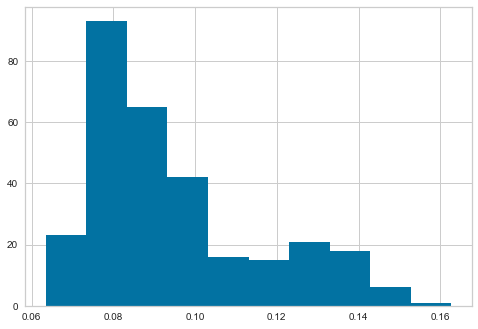

In [43]:
# Reconstruction error without fraud
fig = plt.figure()
ax = fig.add_subplot(111)
normal_error_df = error_df[(error_df['reconstruction_error'] < 10)]
_ = ax.hist(normal_error_df.reconstruction_error.values, bins=10)

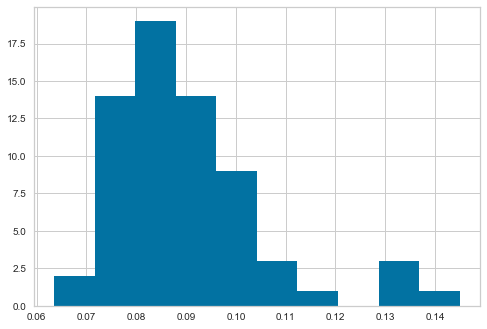

In [44]:
# Reconstruction error with fraud
fig = plt.figure()
ax = fig.add_subplot(111)
fraud_error_df = error_df[error_df['true_class'] == 1]
_ = ax.hist(fraud_error_df.reconstruction_error.values, bins=10)

The metrics used to measure whether fraud transactions are predicted correctly even in Autoencoders are Precision, ROC-AUC curve, Recall, F1-Score. 

In [46]:
#Evaluation Metrics
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

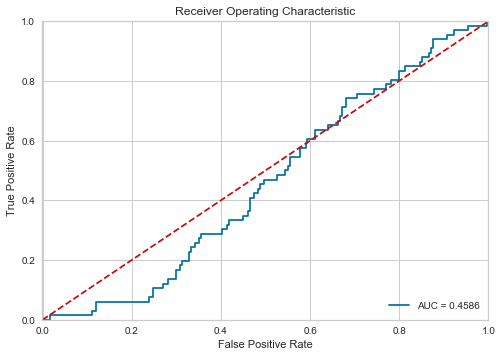

In [47]:
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

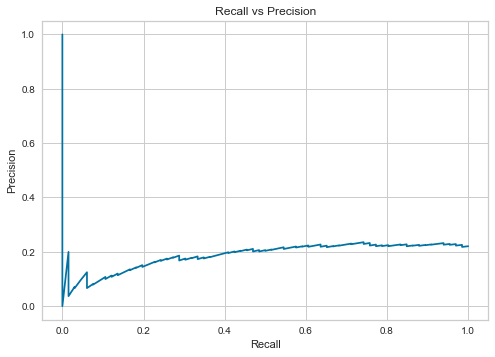

In [48]:
#Precision vs Recall

precision, recall, th = precision_recall_curve(error_df.true_class, error_df.reconstruction_error)
plt.plot(recall, precision, 'b', label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

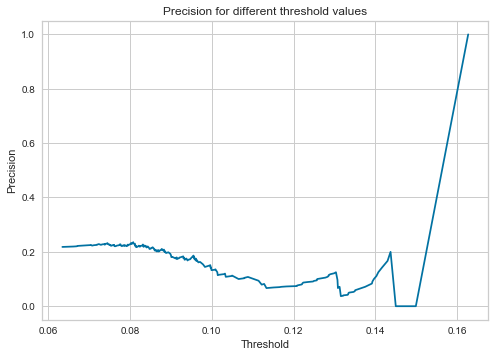

In [49]:
plt.plot(th, precision[1:], 'b', label='Threshold-Precision curve')
plt.title('Precision for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.show()

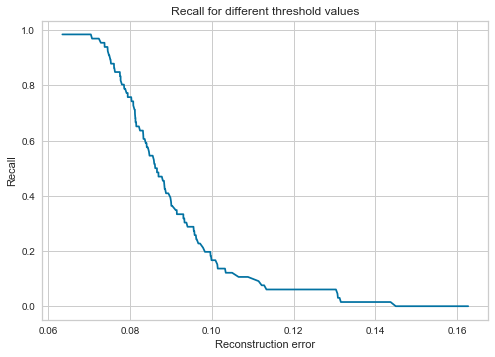

In [50]:
plt.plot(th, recall[1:], 'b', label='Threshold-Recall curve')
plt.title('Recall for different threshold values')
plt.xlabel('Reconstruction error')
plt.ylabel('Recall')
plt.show()

In [51]:
#Prediction
threshold = 2.9


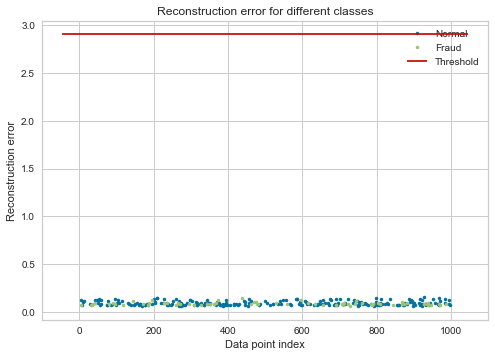

In [52]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();